In [33]:
import cv2
import numpy as np
import struct
import time
import matplotlib.pyplot as plt
import os
import re
import sys
from pathlib import Path

from read_cine import read_cine, convert_cine_to_avi
from track_object import track_object, detect_chamber, update_tracking_result, show_tracking_results, delete_tracking_entry

In [34]:
tr_ifn = r"F:\AUG2025\P23\tracking_result.npy"
show_tracking_results(tr_ifn)

Found 26 entries in tracking results

F:\AUG2025\P23\42_He1kG430G_5450A_P23_K25_shot001.cine
  Frame: 1618
  Time: -0.038200s

F:\AUG2025\P23\42_He1kG430G_5450A_P23_K25_shot002.cine
  Frame: 1537
  Time: -0.046300s

F:\AUG2025\P23\42_He1kG430G_5450A_P23_K25_shot003.cine
  Frame: 1604
  Time: -0.039600s

F:\AUG2025\P23\42_He1kG430G_5450A_P23_K25_shot004.cine
  Frame: 1654
  Time: -0.034600s

F:\AUG2025\P23\42_He1kG430G_5450A_P23_K25_shot005.cine
  Frame: 1557
  Time: -0.044300s

F:\AUG2025\P23\43_He1kG430G_5450A_P23_K25_shot001.cine
  Frame: 1404
  Time: -0.059600s

F:\AUG2025\P23\43_He1kG430G_5450A_P23_K25_shot002.cine
  Frame: 1395
  Time: -0.060500s

F:\AUG2025\P23\43_He1kG430G_5450A_P23_K25_shot003.cine
  Frame: 1586
  Time: -0.041400s

F:\AUG2025\P23\43_He1kG430G_5450A_P23_K25_shot004.cine
  Frame: 1638
  Time: -0.036200s

F:\AUG2025\P23\43_He1kG430G_5450A_P23_K25_shot005.cine
  Frame: None
  Time: None

F:\AUG2025\P23\44_He1kG430G_5450A_P23_K15_shot001.cine
  Frame: 1833
  Time: -

In [28]:
cine_path = r"F:\AUG2025\P24\20_He1kG430G_5800A_K-15_shot001.cine"
avi_path = cine_path.replace('.cine', '.avi')

tarr, frarr, dt = read_cine(cine_path)

# convert_cine_to_avi(frarr, avi_path)

Reading .cine file...
starting frame number: 0
total frames: 3001
frame rate: 20000
Done reading .cine file (10.3 s)


In [ ]:
parr, frarr, cf = track_object(avi_path)

Hough failed, using contour fallback
0.14995


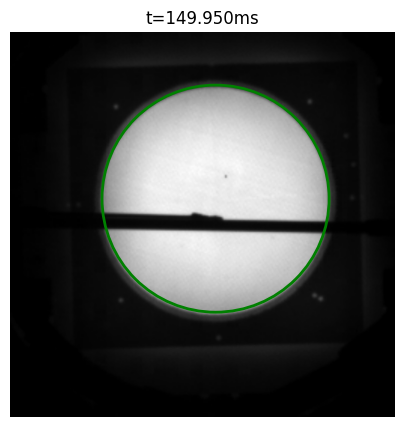

In [29]:
frame_num = 2999

cap = cv2.VideoCapture(avi_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
ret, frame = cap.read()
if not ret:
    raise ValueError(f"Could not read frame")

# Detect chamber
(cx, cy), chamber_radius = detect_chamber(frame)

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Display the original frame
plt.figure(figsize=(15, 5))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Draw the chamber as a circle
chamber_circle = plt.Circle((cx, cy), chamber_radius, fill=False, color='green', linewidth=2)
plt.gca().add_patch(chamber_circle)

plt.title(f"t={tarr[frame_num] * 1e3:.3f}ms")
plt.axis('off')

cap.release()

print(tarr[frame_num])

In [23]:
tarr[2900]

0.145

In [30]:
update_tracking_result(tr_ifn, cine_path, cf_new=3100, ct_new=0.155)
# update_tracking_result(tr_ifn, cine_path, cf_new=frame_num, ct_new=tarr[frame_num])

Loaded existing tracking results with 132 entries

Current values for 20_He1kG430G_5800A_K-15_shot001.cine:
  Frame: 2996
  Time: 0.149800s

Updated values:
  Frame: 3100
  Time: 0.155000s


In [32]:
delete_tracking_entry(tr_ifn, r'F:\AUG2025\P24\27_He1kG430G_5800A_K-5_shot002.cine')

Deleted entry for 27_He1kG430G_5800A_K-5_shot002.cine


In [ ]:
v = 9.8*np.sqrt(2*1/9.8) # velocity at center of chamber in m/s

t1 = 0.027 - tarr[cf]
t2 = 0.037 - tarr[cf]
print(t1)
print(t2)

x1 = v*t1 + 0.5*9.8*t1**2
x2 = v*t2 + 0.5*9.8*t2**2

print(x1)
print(x2)

In [5]:
tracking_dict = np.load(tr_ifn, allow_pickle=True).item()
prefixes = [os.path.basename(k)[:3] for k in tracking_dict.keys()]
shot_numbers = [int(os.path.basename(k).split('_shot')[1][:3]) for k in tracking_dict.keys()]
print(shot_numbers)
print(prefixes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 2, 3, 2, 3, 5, 1, 2, 4, 5, 2, 2, 3, 4, 1, 2, 3, 5, 1, 1, 2, 3, 5, 1, 2, 3, 5, 1, 2, 4, 5, 1, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1]
['00_', '00_', '00_', '00_', '00_', '00_', '00_', '00_', '00_', '00_', '10_', '10_', '10_', '10_', '10_', '02_', '02_', '04_', '04_', '04_', '06_', '06_', '06_', '06_', '07_', '08_', '08_', '08_', '09_', '09_', '09_', '09_', '11_', '12_', '12_', '12_', '12_', '13_', '14_', '14_', '14_', '15_', '15_', '15_', '15_', '16_', '16_', '16_', '16_', '17_', '17_', '17_', '17_', '17_', '18_', '18_', '18_', '18_', '18_', '19_', '19_', '19_', '19_', '19_', '20_', '20_', '20_', '20_', '20_', '21_']
